In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
conn = sqlite3.connect("factbook.db")
query = "select * from sqlite_master where type='table'"
tables = pd.read_sql_query(query, conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [3]:
q = "select * from facts limit 5"
facts = pd.read_sql_query(q, conn)
facts

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [4]:
q = "select MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) from facts"
pd.read_sql_query(q, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [5]:
q_full = "select * from facts"
facts = pd.read_sql_query(q_full, conn)

In [6]:
q_0_pop = "select * from facts where population = 0 or population is null"
pd.read_sql_query(q_0_pop, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,198,at,Ashmore and Cartier Islands,5.0,5.0,0.0,NaN,None,None,None,None,2015-11-01 13:36:08.110412,2015-11-01 13:36:08.110412
1,201,cr,Coral Sea Islands,3.0,3.0,0.0,NaN,None,None,None,None,2015-11-01 13:36:14.538308,2015-11-01 13:36:14.538308
2,202,hm,Heard Island and McDonald Islands,412.0,412.0,0.0,NaN,None,None,None,None,2015-11-01 13:36:16.132554,2015-11-01 13:36:16.132554
3,208,ip,Clipperton Island,6.0,6.0,0.0,NaN,None,None,None,None,2015-11-01 13:36:36.882778,2015-11-01 13:36:36.882778
4,210,fs,French Southern and Antarctic Lands,NaN,NaN,NaN,NaN,None,None,None,None,2015-11-01 13:36:43.532683,2015-11-01 13:36:43.532683
5,222,bv,Bouvet Island,49.0,49.0,0.0,NaN,None,None,None,None,2015-11-01 13:37:20.214829,2015-11-01 13:37:20.214829
6,223,jn,Jan Mayen,377.0,377.0,0.0,NaN,None,None,None,None,2015-11-01 13:37:21.875600,2015-11-01 13:37:21.875600
7,228,io,British Indian Ocean Territory,54400.0,60.0,54340.0,NaN,None,None,None,None,2015-11-01 13:37:35.922896,2015-11-01 13:37:35.922896
8,240,sx,South Georgia and South Sandwich Islands,3903.0,3903.0,0.0,NaN,None,None,None,None,2015-11-01 13:38:13.551151,2015-11-01 13:38:13.551151
9,244,bq,Navassa Island,5.0,5.0,0.0,NaN,None,None,None,None,2015-11-01 13:38:26.425234,2015-11-01 13:38:26.425234


In [7]:
q_big_pop = "select * from facts where population = (select MAX(population) from facts)"
pd.read_sql_query(q_big_pop, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


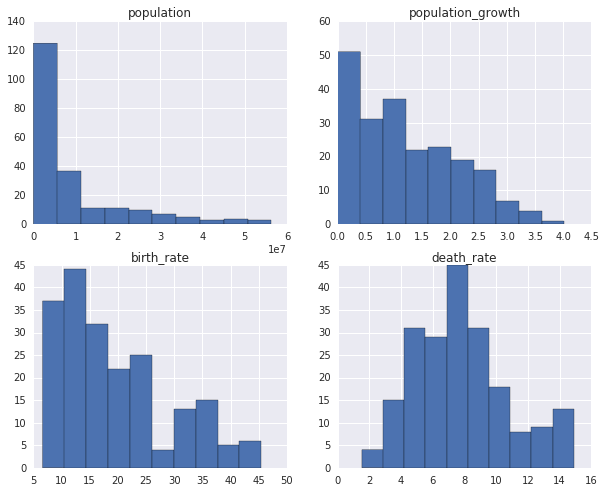

In [27]:
q = "select population, population_growth, birth_rate, death_rate from facts where (population != 0) AND (population != 7256490011) AND (population < 60000000)"
df = pd.read_sql_query(q, conn)
i = 1
plt.figure(figsize=(10,8))
for col in df.columns:
    plt.subplot(2,2,i)
    df[col].hist()
    plt.title(col)
    i += 1